# Churn in Telecom's Dataset - Bhuvnesh Gupta

- The Sheet is structured in **4 steps**:
    1. Understanding data and manipulation
    2. Data visualization
    3. Implementing Machine Learning models
    4. Model Evaluation and concluding with the best of the model.


In [247]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

### Importing the data

In [248]:
df =  pd.read_csv("Churn.csv")
df_v=df #copy of dataframe for visualization purposes
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Understanding the data

In [249]:
print("(Rows,Columns) ",df.shape)
print ("\nFeatures : \n" ,df.columns.tolist())

(Rows,Columns)  (7043, 21)

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [250]:
df2 = pd.DataFrame(data=[df.isnull().sum(),df.nunique()],index=["Missing Values","Unique Values"])
df2.transpose()

,Missing Values,Unique Values
customerID,0,7043
gender,0,2
SeniorCitizen,0,2
Partner,0,2
Dependents,0,2
tenure,0,73
PhoneService,0,2
MultipleLines,0,3
InternetService,0,3
OnlineSecurity,0,3


### Data Manipulation

In [251]:
df.dtypes
#THIS SHOWS THE DATA TYPES OF ALL COLUMNS

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [252]:
df["TotalCharges"] = df["TotalCharges"].apply(pd.to_numeric, errors='coerce')
df['TotalCharges'].fillna((df['TotalCharges'].mean()), inplace=True)
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

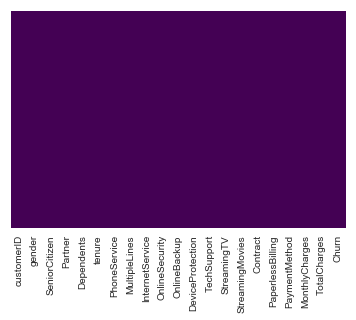

In [343]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') 
#HEATMAP SHOWS ANY MISSING VALUE IN THE DATA

LABEL ENCODING THE DATA

In [254]:
lbl_en_col = ['gender' , 'Partner' , 'Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod','Churn']

In [255]:
encode = LabelEncoder()
for col in lbl_en_col: 
    df[col] = encode.fit_transform(df[col])

In [256]:
df.dtypes

customerID           object
gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

### Data Visualization

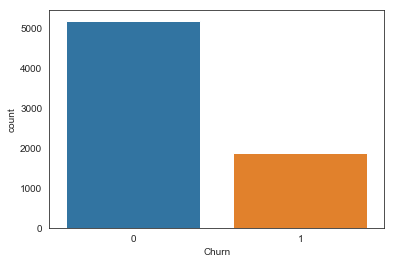

In [257]:
sns.set_style('white')
sns.countplot(x='Churn',data=df)

In [258]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


No multicolinearity - 
We observe it when two or more variables have a high coorelation.
If a can be represented using b, there is no pint using both
c and d have a correlation of 90% (imprefect multicolinearity). if c can be almost
represented using d there is no point using both.

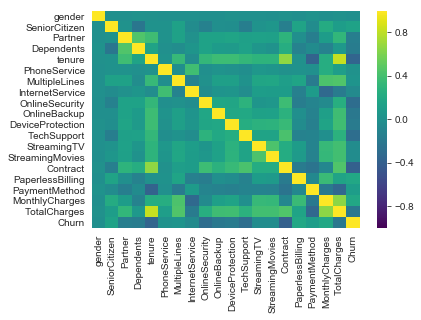

In [259]:
sns.heatmap(df.corr(),vmin=-1, vmax=1, center=0,cmap='viridis') 

In [260]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375362,-0.195525


C:\Users\Bhuvnesh\Anaconda3\envs\python-cvcourse\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


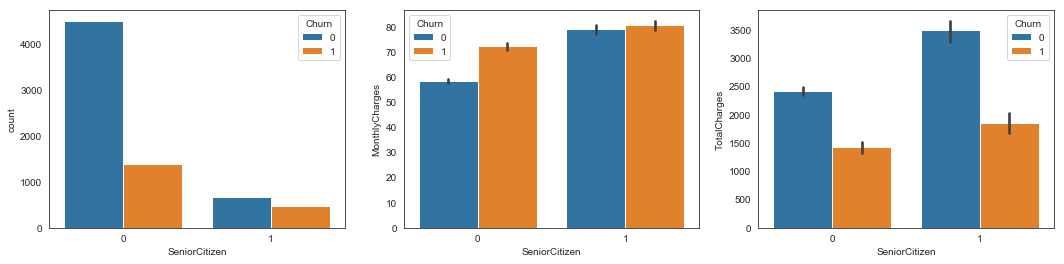

In [261]:
fig, axis = plt.subplots(1, 3, figsize=(18,4))
sns.countplot(x='SeniorCitizen', hue="Churn",data=df,ax=axis[0])
sns.barplot(x='SeniorCitizen', y= "MonthlyCharges", hue='Churn', data=df,ax=axis[1])
sns.barplot(x='SeniorCitizen', y= "TotalCharges", hue='Churn', data=df,ax=axis[2])

    ->Senior Citizens with high total charges are less likely to Churn
    ->And Senior Citizens comprise a very small amount of our dataset

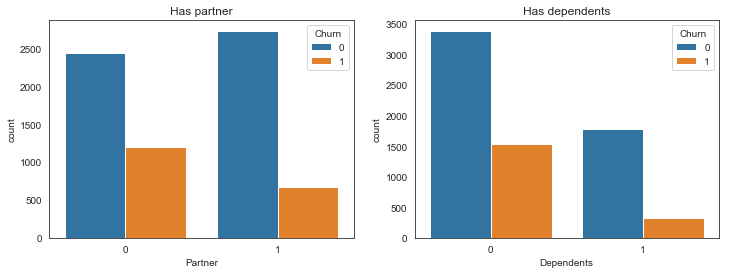

In [262]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Has partner")
axis[1].set_title("Has dependents")
axis_y = "percentage of customers"
sns.countplot(x='Partner', hue="Churn",data=df,ax=axis[0])
sns.countplot(x='Dependents', hue="Churn",data=df,ax=axis[1])

    -> People with a partner are less likely to Churn as compared to ones without a partner
    -> Similarly, the same is with the people having Dependents

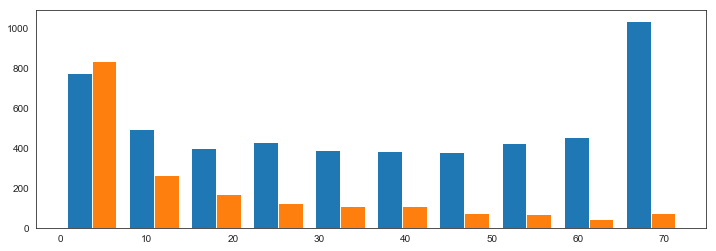

In [263]:
fig, axis = plt.subplots(1, 1, figsize=(12,4))
ax = plt.hist([df[df["Churn"] == 0]['tenure'],df[df["Churn"] == 1]['tenure']],data=df)

    -> People with low tenure are more likely to churn whereas the people with high tenure are less likely to Churn

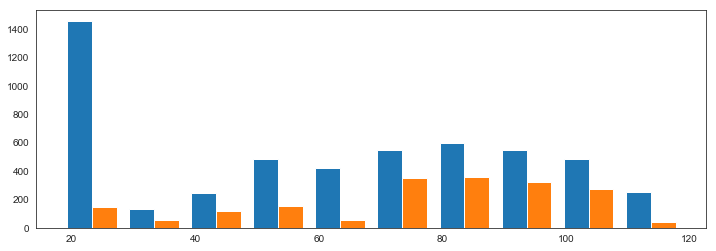

In [264]:
fig, axis = plt.subplots(1, 1, figsize=(12,4))
ax = plt.hist([df[df["Churn"] == 0]['MonthlyCharges'],df[df["Churn"] == 1]['MonthlyCharges']],data=df)

    -> People with avg Monthly Charges are more likely to churn

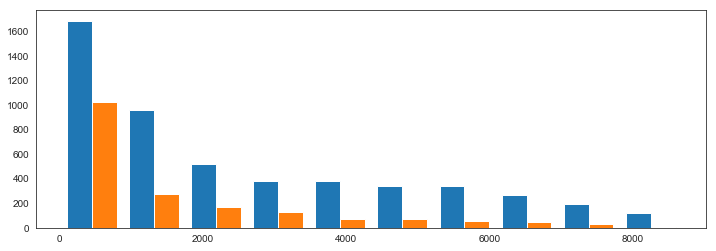

In [265]:
fig, axis = plt.subplots(1, 1, figsize=(12,4))
ax =plt.hist([df[df["Churn"] == 0]['TotalCharges'],df[df["Churn"] == 1]['TotalCharges']],data=df)

    -> People with high total Charges are less likely to churn

C:\Users\Bhuvnesh\Anaconda3\envs\python-cvcourse\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


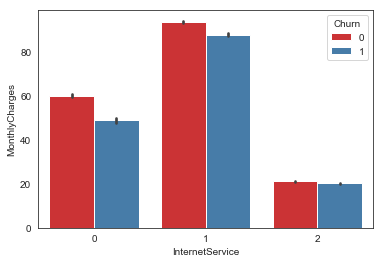

In [344]:
sns.barplot(x="InternetService", y="MonthlyCharges", data=df,hue='Churn',palette='Set1')

### Implement Machine Learning Models

In [318]:
features=df.drop(columns=['Churn','customerID'],axis=1)
target=df['Churn']

In [319]:
features.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


### LOGISTIC REGRESSION

In [320]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20,random_state=1234)

In [321]:
model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=2, warm_start=False)
model.fit(X_train,y_train)

[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=2, warm_start=False)

In [322]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [323]:
predictions = model.predict(X_test)
print ("\n Classification report : \n",classification_report(y_test,predictions))
print ("\n Accuracy Score : \n",accuracy_score(y_test,predictions))
print ("\n Confusion Matrix : \n",confusion_matrix(y_test,predictions))


 Classification report : 
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      1046
           1       0.61      0.55      0.58       363

   micro avg       0.79      0.79      0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409


 Accuracy Score : 
 0.7920511000709723

 Confusion Matrix : 
 [[915 131]
 [162 201]]


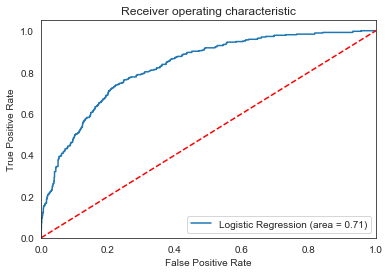

In [324]:

#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
area_under_curve = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % area_under_curve)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

### Naive Bayes

In [339]:
from sklearn.naive_bayes import GaussianNB

In [340]:
gaussian_model = GaussianNB()
gaussian_model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [341]:
gaussian_predict = gaussian_model.predict(X_test)
print ("\n Classification report : \n",classification_report(y_test,gaussian_predict))
print ("\n Accuracy Score : \n",accuracy_score(y_test,gaussian_predict))
print ("\n Confusion Matrix : \n",confusion_matrix(y_test,gaussian_predict))


 Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.88      0.86      1046
           1       0.59      0.50      0.54       363

   micro avg       0.78      0.78      0.78      1409
   macro avg       0.71      0.69      0.70      1409
weighted avg       0.77      0.78      0.78      1409


 Accuracy Score : 
 0.7814052519517388

 Confusion Matrix : 
 [[920 126]
 [182 181]]


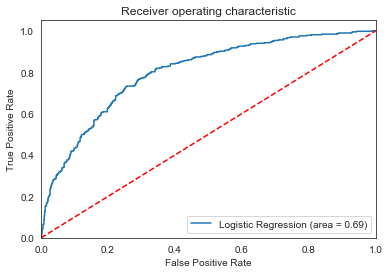

In [342]:
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
area_under_curve = roc_auc_score(y_test, gaussian_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gaussian_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes(area = %0.2f)' % area_under_curve)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

### Model Evaluation

In [329]:
df_old = X_test.copy()
df_old["Churn"] = predictions
df_old.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6692,0,0,0,0,41,1,2,0,2,0,2,2,0,2,0,1,0,74.65,3090.65,0
2624,1,0,1,1,17,1,2,0,0,2,2,2,0,0,0,1,3,66.70,1077.05,0
1076,0,0,1,1,58,1,2,2,1,1,1,1,1,1,1,1,1,24.50,1497.90,0
1428,1,0,0,0,1,1,2,0,0,0,0,0,0,0,0,1,2,50.45,50.45,1
7026,0,0,0,0,9,1,0,0,0,0,0,0,0,0,0,1,0,44.20,403.35,0


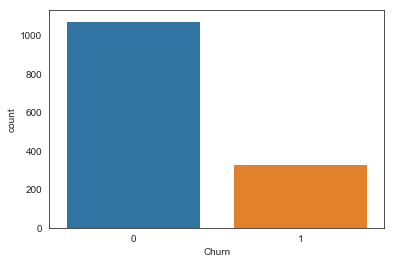

In [330]:
sns.countplot(x="Churn",data = df_old)

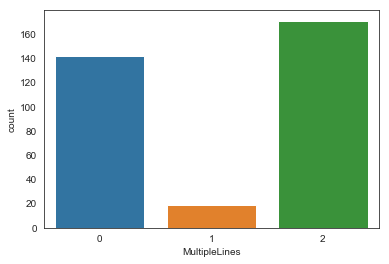

In [331]:
sns.countplot(x = "MultipleLines",data = df_old[df_old["Churn"] == 1])

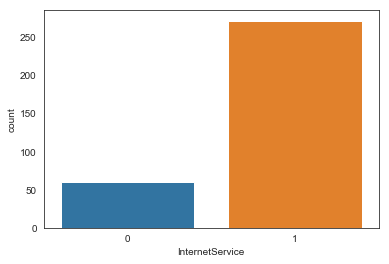

In [332]:
sns.countplot(x = "InternetService",data = df_old[df_old["Churn"] == 1])

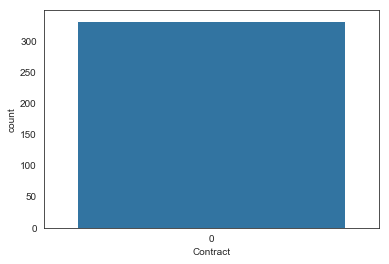

In [333]:
sns.countplot(x = "Contract",data = df_old[df_old["Churn"] == 1])

THIS SHOWS THAT PEOPLE ONLY WITH "MONTH TO MONTH" CONTRACT TEND TO CHURN MORE OFTEN SO TO TACKLE THIS PROBLEM COMPANY SHOW LURE CUSTOMERS TOWARDS ONE YEAR OR TWO YEAR PLANS.

In [334]:
#Suppose the company tackled this issue and was successful of coverting the plans to 1 year plan
X_test["Contract"] = 1
X_test.head()

C:\Users\Bhuvnesh\Anaconda3\envs\python-cvcourse\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6692,0,0,0,0,41,1,2,0,2,0,2,2,0,2,1,1,0,74.65,3090.65
2624,1,0,1,1,17,1,2,0,0,2,2,2,0,0,1,1,3,66.70,1077.05
1076,0,0,1,1,58,1,2,2,1,1,1,1,1,1,1,1,1,24.50,1497.90
1428,1,0,0,0,1,1,2,0,0,0,0,0,0,0,1,1,2,50.45,50.45
7026,0,0,0,0,9,1,0,0,0,0,0,0,0,0,1,1,0,44.20,403.35


In [335]:
new_predictions = model.predict(X_test)
print ("\n Classification report : \n",classification_report(y_test,new_predictions))
print ("\n Accuracy Score : \n",accuracy_score(y_test,new_predictions))
print ("\n Confusion Matrix : \n",confusion_matrix(y_test,new_predictions))


 Classification report : 
               precision    recall  f1-score   support

           0       0.78      0.98      0.87      1046
           1       0.79      0.19      0.30       363

   micro avg       0.78      0.78      0.78      1409
   macro avg       0.78      0.59      0.59      1409
weighted avg       0.78      0.78      0.72      1409


 Accuracy Score : 
 0.7778566359119943

 Confusion Matrix : 
 [[1028   18]
 [ 295   68]]


In [336]:
df_edited = X_test.copy()
df_edited["Churn"] = new_predictions.copy()
df_edited.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6692,0,0,0,0,41,1,2,0,2,0,2,2,0,2,1,1,0,74.65,3090.65,0
2624,1,0,1,1,17,1,2,0,0,2,2,2,0,0,1,1,3,66.70,1077.05,0
1076,0,0,1,1,58,1,2,2,1,1,1,1,1,1,1,1,1,24.50,1497.90,0
1428,1,0,0,0,1,1,2,0,0,0,0,0,0,0,1,1,2,50.45,50.45,0
7026,0,0,0,0,9,1,0,0,0,0,0,0,0,0,1,1,0,44.20,403.35,0


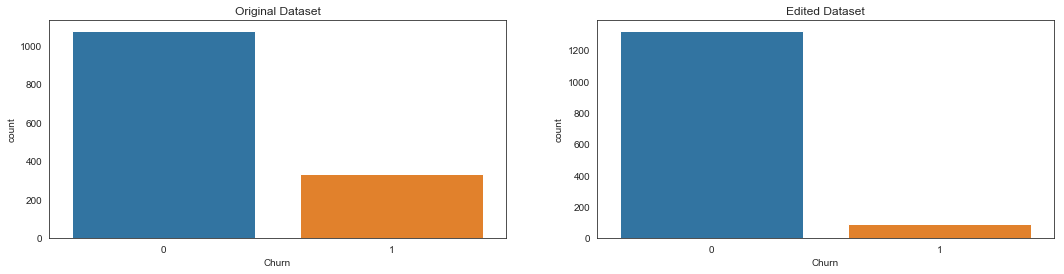

In [337]:
fig, axis = plt.subplots(1, 2, figsize=(18,4))
axis[0].set_title("Original Dataset")
axis[1].set_title("Edited Dataset")
sns.countplot(x="Churn",data = df_edited,ax=axis[1])
sns.countplot(x="Churn",data = df_old,ax=axis[0])

### Final Conclusions

In [338]:
print(df_old["Churn"].value_counts())
print(df_edited["Churn"].value_counts())

0    1077
1     332
Name: Churn, dtype: int64
0    1323
1      86
Name: Churn, dtype: int64


## THIS DRASTIC CHANGE IN THE CHURN OF CUSTOMERS WAS ACHIEVED BY CHANGING THEIR CONTRACT PLAN FROM "MONTH TO MONTH" TO "ONE YEAR PLAN" 